In [12]:
# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도


In [15]:
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

!apt-get update -qq
!apt-get install fonts-nanum* -qq

3.2.2
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib
sys_font number: 17
['/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/Liberati

In [16]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [18]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

Python 3.6.9
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0
NanumGothic Eco


In [19]:
# 우선 fm._rebuild() 를 해주고
fm._rebuild()

In [20]:
mpl.rcParams['axes.unicode_minus'] = False

In [63]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [322]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [323]:
from sklearn.mixture import GaussianMixture
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

In [324]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [
     [0.2, 2.3],
     [-1.5, 2.3],
     [-2.8, 1.8],
     [-2.8, 2.8],
     [-2.8, 1.3]
    ]
)

blob_std = np.array(
    [0.4, 0.3, 0.1, 0.1, 0.1]
)

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

In [325]:
from sklearn.cluster import KMeans
k = 5

#kmeans = KMeans(n_clusters=k)
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [326]:
y_pred

array([4, 1, 0, ..., 3, 0, 1], dtype=int32)

In [327]:
y_pred is kmeans.labels_

True

In [328]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [329]:
X_new = np.array(
    [
     [0, 2],
     [3, 2],
     [-3, 3],
     [-3, 2.5]
    ]
)
kmeans.predict(X_new)


array([0, 0, 3, 3], dtype=int32)

In [330]:
good_init = np.array(
    [
     [-3, 3],
     [-3, 2],
     [-3, 1],
     [-1, 2],
     [0, 2]
    ]
)

kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)

In [331]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True,
       init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       max_iter=300, n_clusters=5, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=42, tol=0.0001, verbose=0)

In [332]:
kmeans.inertia_

211.5985372581684

In [333]:
kmeans.score(X)

-211.59853725816856

In [334]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [335]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.655517642572828

9.1.3 군집을 사용한 이미지 분할

In [336]:
import urllib

images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)

url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7fdec05ed390>)

In [337]:
from matplotlib.image import imread
image = imread(os.path.join("images", "unsupervised_learning", "ladybug.png"))
image.shape

(533, 800, 3)

In [338]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)

In [339]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [340]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [341]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)


In [342]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [343]:
log_reg.score(X_test, y_test)

0.9466666666666667

In [344]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    [
     ("kmeans", KMeans(n_clusters=50, random_state=42)),
     ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
    ]
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [345]:
pipeline.score(X_test, y_test)

0.9733333333333334

In [347]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 25.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                      

In [359]:
grid_clf.best_params_

{'kmeans__n_clusters': 83}

In [360]:
grid_clf.score(X_test, y_test)

0.9711111111111111

In [361]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7822222222222223

In [364]:
k = 50

kmeans = KMeans(n_clusters=50, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

그림 저장: representative_images_diagram


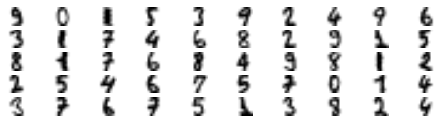

In [363]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_diagram", tight_layout=False)
plt.show()

In [369]:
y_representative_digits = np.array(
    [9, 0, 1, 5, 3, 9, 2, 4, 9, 6, 
     3, 1, 7, 4, 6, 8, 2, 9, 1, 5,
     8, 1, 7, 6, 8, 4, 9, 8, 1, 2,
     2, 5, 4, 6, 7, 5, 7, 0, 1, 4,
     3, 7, 6, 7, 5, 1, 3, 8, 2, 4]
)

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9155555555555556

In [370]:
y_train_propagated = np.empty(
    len(X_train), dtype=np.int32
)

for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [371]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9311111111111111

In [372]:
percentile_closets = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
  in_cluster = (kmeans.labels_ == i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closets)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [373]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [374]:
log_reg.score(X_test, y_test)

0.9244444444444444

In [376]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9931506849315068

In [378]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [379]:
dbscan.labels_

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2,  2,  4,
        2,  2,  4,  0,  5,  1,  0,  5,  5,  3,  2,  2,  2,  4,  5,  0,  6,
        1, -1,  0,  0,  2,  3, -1,  3,  4, -1,  4,  4,  2,  0,  6,  2,  0,
        2,  4,  0,  3,  3,  0,  3,  5,  2, -1,  3,  0,  5,  0,  0,  0,  2,
        3,  0,  3,  6,  0,  2,  4,  4,  0,  3,  0,  4,  0,  3, -1,  3,  4,
        0, -1,  2,  2,  4,  1,  6,  0,  5,  2,  6,  2,  3,  3, -1,  2, -1,
        2,  4,  0,  0,  0,  2,  5,  2,  0,  2, -1,  2,  3,  1,  5,  2,  0,
        4,  2,  1,  2,  4,  4,  0,  0,  6,  2,  2,  0,  2, -1,  2,  0,  3,
        3,  5, -1,  3,  3,  5,  2,  4,  2,  2,  2,  4,  2,  4,  0, -1,  2,
        1,  2,  6,  4,  2,  3,  2, -1,  2,  0,  0,  2,  0,  4,  0,  4,  4,
        1,  6,  3,  2,  6,  1,  4,  4,  2,  0,  6,  0,  1,  0,  2,  5,  1,
        1,  2,  2,  2,  2,  0,  5,  5,  1,  4,  5,  0,  3,  3,  0,  0,  0,
        2,  0,  5,  2, -1,  2,  3,  5,  2,  2,  0,  4,  0,  4,  2,  2,  4,
        2,  2,  3,  2,  3

In [380]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [381]:
len(dbscan.core_sample_indices_)

808

In [382]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [383]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [386]:
X_new = np.array(
    [
     [-0.5, 0],
     [0, 0.5],
     [1, -0.1],
     [2,1]
    ]
)

knn.predict(X_new)

array([6, 0, 3, 2])

In [387]:
knn.predict_proba(X_new)

array([[0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.76],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.3 , 0.7 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

In [388]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  3, -1])

9.2 가우시안 혼합

In [390]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [391]:
gm.weights_

array([0.20345532, 0.20851624, 0.58802845])

In [393]:
gm.means_

array([[-0.74755757,  0.55598414],
       [ 1.73126622, -0.06888582],
       [ 0.49376984,  0.25492982]])

In [395]:
gm.covariances_

array([[[ 0.05362625,  0.06211532],
        [ 0.06211532,  0.08991183]],

       [[ 0.06097135,  0.06558296],
        [ 0.06558296,  0.08771273]],

       [[ 0.16424638, -0.0977768 ],
        [-0.0977768 ,  0.28774013]]])

In [396]:
gm.converged_

True

In [397]:
gm.n_iter_

17

In [398]:
gm.predict(X)

array([2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 0, 1,
       0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2,
       2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 1, 1, 2, 0, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 2, 1, 0,
       1, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0,
       2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2,
       0, 1, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2,
       0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 2, 2,

In [399]:
gm.predict_proba(X)

array([[5.05296147e-014, 2.01723885e-081, 1.00000000e+000],
       [1.39914437e-121, 3.35297307e-004, 9.99664703e-001],
       [5.92486863e-109, 9.31792959e-007, 9.99999068e-001],
       ...,
       [2.01374906e-185, 9.84006261e-001, 1.59937393e-002],
       [9.99676981e-001, 1.27528587e-161, 3.23018526e-004],
       [5.62082069e-046, 4.95963868e-039, 1.00000000e+000]])

In [400]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.66142041,  0.37926277],
       [ 1.63630312, -0.25976558],
       [-0.2742874 ,  1.1152957 ],
       [ 0.83327306, -0.68530721],
       [ 1.26966955, -0.63584643],
       [ 1.08471486, -0.79759021]])

In [401]:
y_new

array([0, 1, 2, 2, 2, 2])

In [402]:
gm.score_samples(X)

array([-1.59026315e+00, -1.83432290e+00, -1.56884873e+00, -1.90427892e+00,
       -2.35144596e-01, -1.34533323e+00, -1.59028275e+00, -1.58320750e+00,
       -3.48360141e-01, -1.80013798e+00, -1.86776314e+00, -1.67087484e+00,
       -1.44785965e+00, -4.68548938e-01, -8.67111773e-01,  2.02085800e-02,
       -2.16436485e+00, -7.08243587e-01, -1.97871881e+00, -8.91571707e-01,
       -1.76056780e+00, -1.76794365e+00, -1.16699924e-01, -1.59270508e+00,
       -1.53846458e+00, -1.75407425e+00, -1.66303992e+00, -1.21997683e+00,
       -3.22432316e-01, -5.49554742e-01, -5.07864916e-01, -1.44009376e+00,
       -1.82146118e+00, -2.00604332e+00,  7.63703910e-03, -1.96272590e+00,
       -1.57658670e+00, -1.27906017e+00, -2.83060335e-01, -1.56978589e+00,
       -1.19354293e+00, -1.66652137e+00, -1.03969288e+00, -1.19919345e+00,
       -1.47711929e+00, -2.10754799e+00, -1.70535559e+00, -1.57060984e+00,
       -3.17655249e-01, -5.78361261e-01, -1.81860465e+00, -8.95208215e-01,
       -1.95794995e+00, -

9.2.1 가우시안 혼합을 사용한 이상치 탐지

In [403]:
densities = gm.score_samples(X)

In [404]:
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

9.2.2 클러스터 개수 선택하기

In [405]:
gm.bic(X)

2807.942709621491

In [406]:
gm.aic(X)

2724.5108698787944

9.2.3 베이즈 가우시안 혼합 모델

In [407]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.12, 0.12, 0.16, 0.13, 0.15, 0.13, 0.13, 0.06, 0.  , 0.  ])